# K-Nearest Neighbors (K-NN)

## Dataset:
The Breast Cancer Wisconsin (Diagnostic) Dataset contains 569 instances of breast cancer tumors, with features computed from digitized images of fine needle aspirates. Each instance includes the diagnosis (malignant or benign) as the target variable and features such as radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension. This dataset is publicly available and has been widely used for machine learning research in the field of breast cancer diagnosis and classification.

Here's a brief overview of the columns:

id: This is likely a unique identifier for each patient or observation in the dataset. It's used to distinguish between different individuals or cases.

diagnosis: This is the target variable indicating whether the cancer diagnosis for a particular patient is malignant (M) or benign (B). It's what we aim to predict using the other features in the dataset.

radius_mean: The mean of distances from the center to points on the perimeter of the tumor. This feature provides information about the size of the tumor.

texture_mean: The standard deviation of gray-scale values in the image. It gives an indication of the variation in pixel intensities within the tumor, which could be related to the tumor's appearance or texture.

perimeter_mean: The perimeter (circumference) of the tumor. This feature provides information about the boundary of the tumor.

area_mean: The area of the tumor. It's a measure of the size of the tumor, derived from the radius or perimeter.

smoothness_mean: A measure of the variation in radius lengths. It describes how smooth or irregular the boundary of the tumor is.

compactness_mean: A measure of how compact the shape of the tumor is. It's calculated as the perimeter squared divided by the area, providing insight into the shape irregularity of the tumor.

concavity_mean: Severity of concave portions of the contour. It indicates the presence and severity of concave regions within the tumor boundary.

concave_points_mean: Number of concave portions of the contour. This feature provides additional information about the shape characteristics of the tumor.

symmetry_mean: Symmetry of the tumor. It describes the degree of symmetry in the tumor's shape.

fractal_dimension_mean: A measure of how complex the tumor boundary is. It quantifies the complexity of the tumor's perimeter, which could provide insights into its irregularity

In [112]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Loading the dataset
df= pd.read_csv('Cancer_dataset.csv')
#Print the first 5 rows of the dataframe.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Basic EDA and Statistical Analysis

In [34]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [36]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


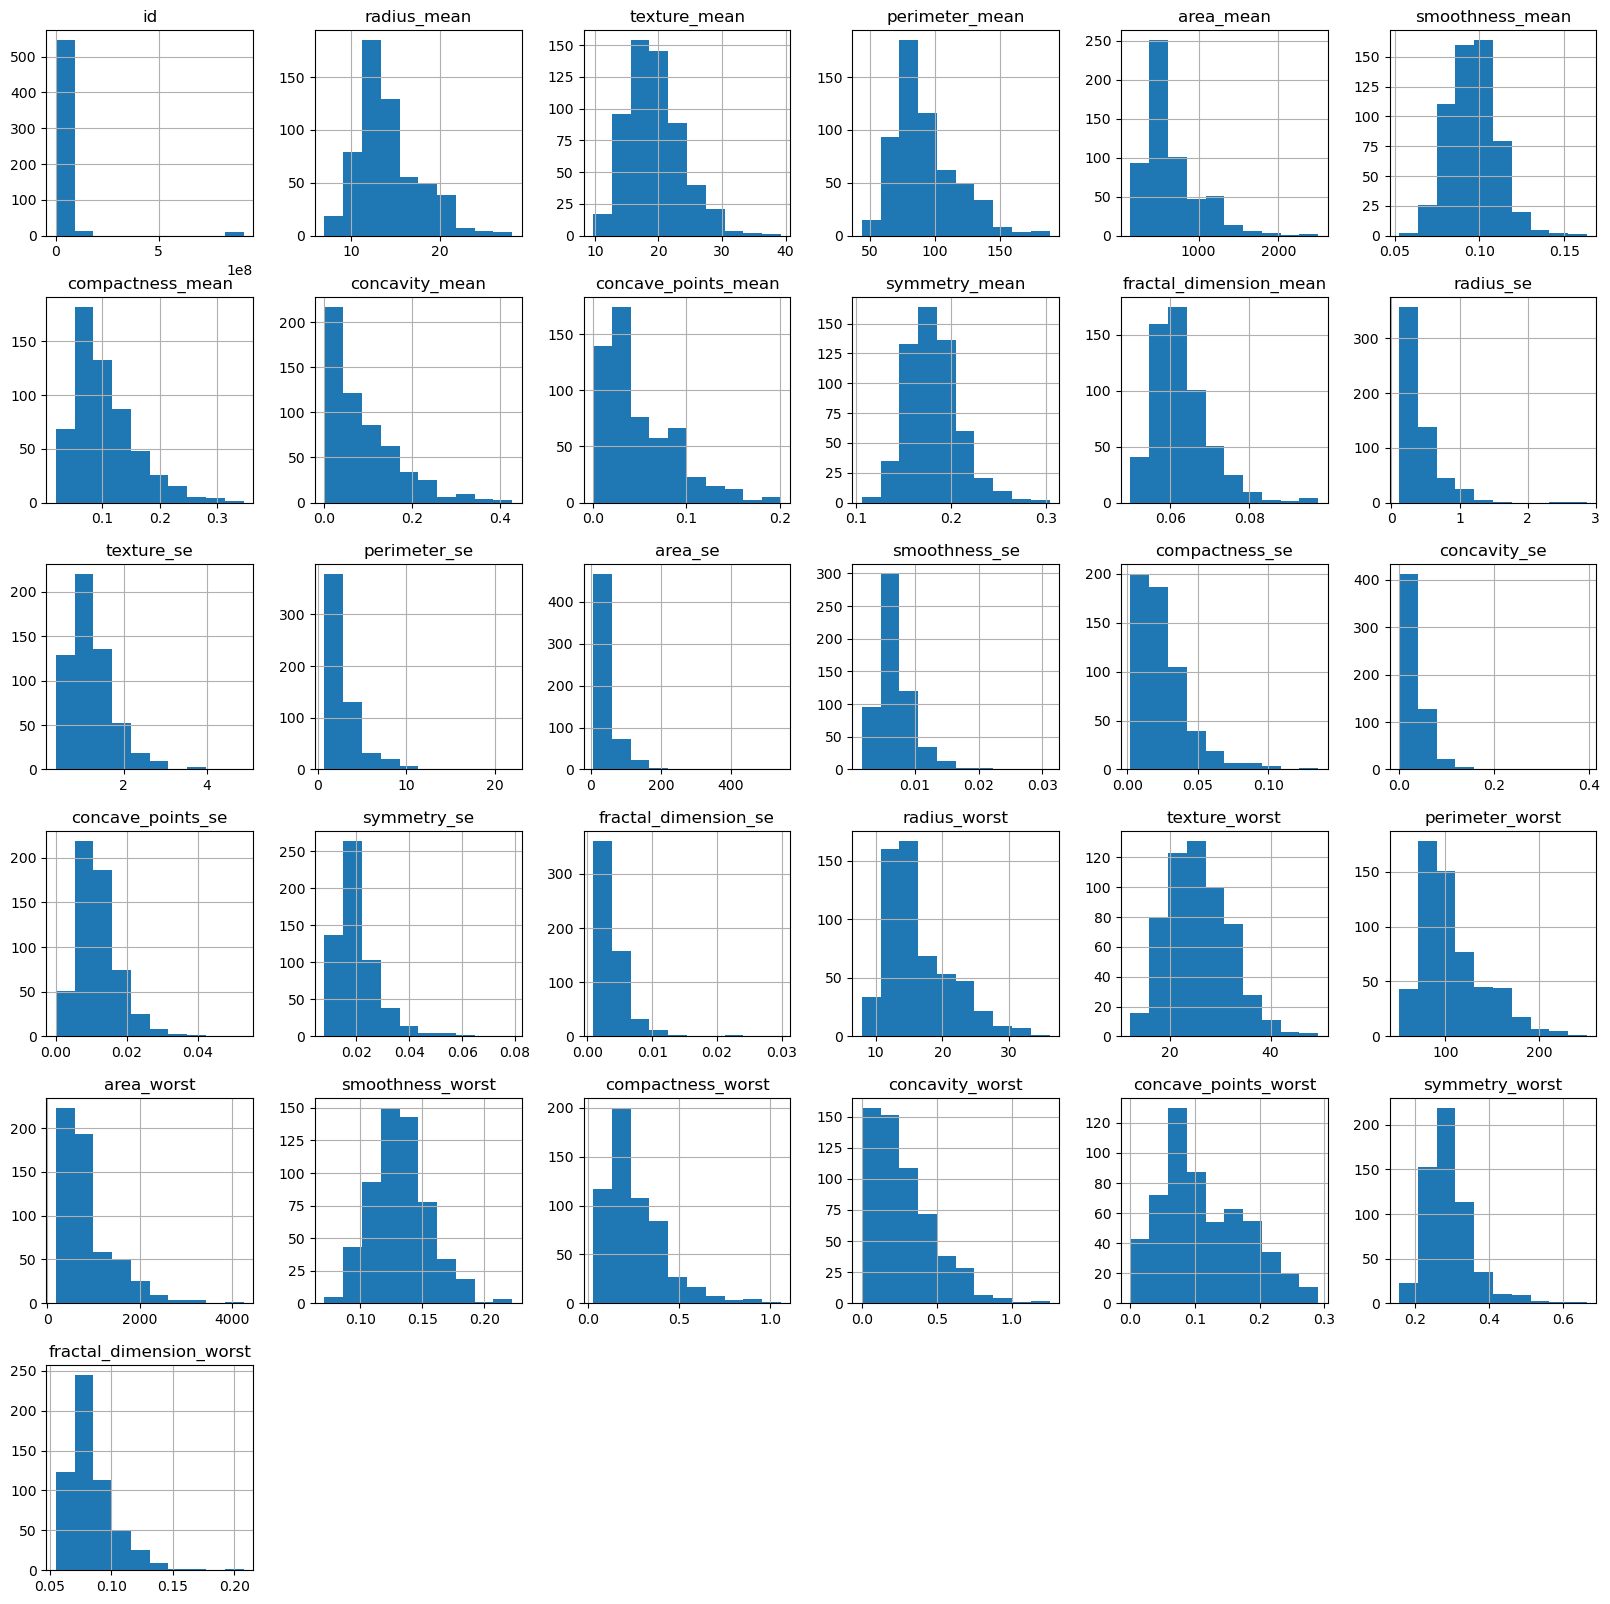

In [37]:
p = df.hist(figsize = (20,20))

In [38]:
df.shape

(569, 32)

In [39]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [46]:
# convert String to numeric  
d = {'M':1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(d)

In [51]:
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

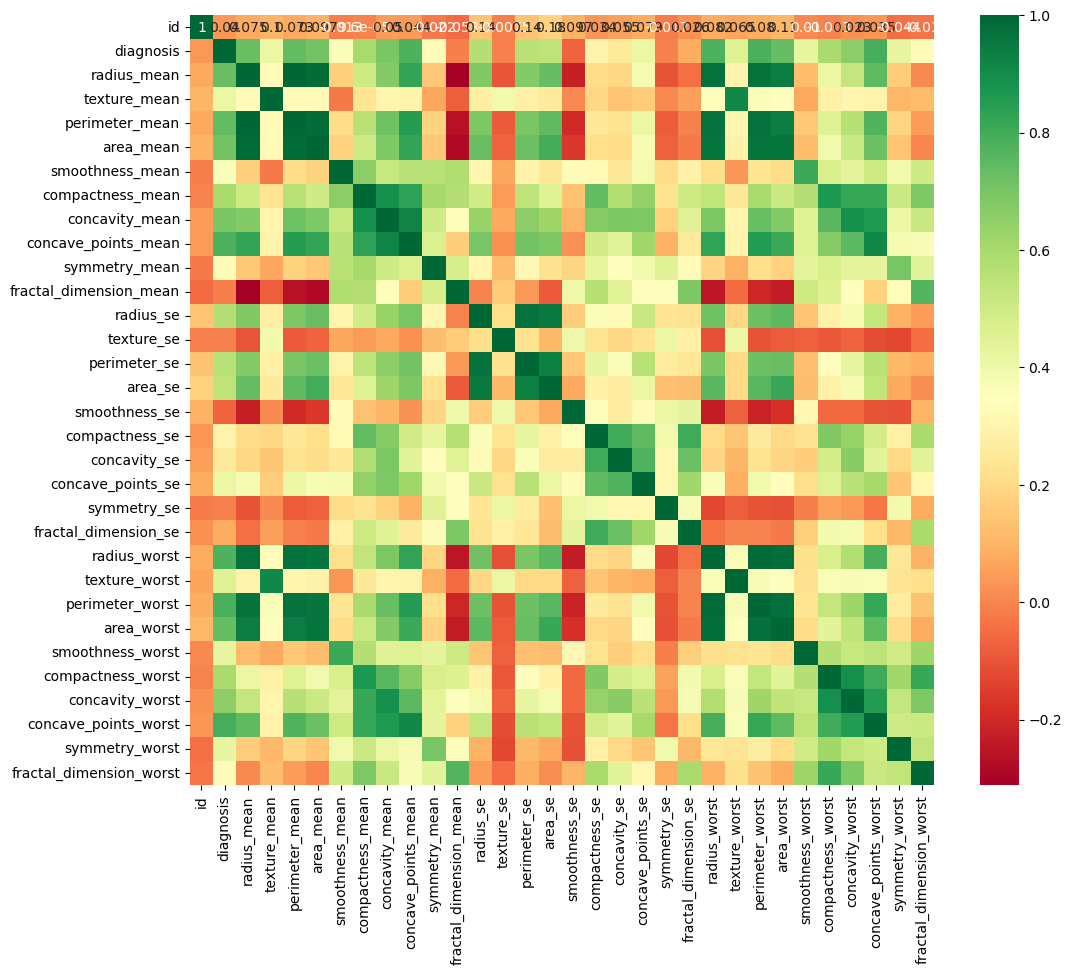

In [54]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap


# Scaling the data

In [59]:
# Extract feature columns
features = df.drop(columns=['diagnosis']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the feature columns
df[features] = scaler.fit_transform(df[features])


In [60]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Train Test Split 

In [62]:
# Separate features and target using iloc
# Assuming 'diagnosis' is the second column (index 1)
X = df.iloc[:, 2:]  # all rows, from the third column to the end (features)
y = df.iloc[:, 1]   # all rows, second column (target)


In [63]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [93]:
# Initialize lists to store scores
train_scores = []
test_scores = []

# Range of k values to test
k_range = range(1, 20)

# Loop over different values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training and test scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [94]:
# Convert to numpy arrays for easy indexing
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

# Find the maximum training score and corresponding k values
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score: {:.2f}% and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

# Find the maximum test score and corresponding k values (optional for comparison)
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score: {:.2f}% and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))


Max train score: 100.00% and k = [1]
Max test score: 95.79% and k = [5, 7]


# Visualisation

C:\Users\acer\.anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\.anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\.anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\.anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

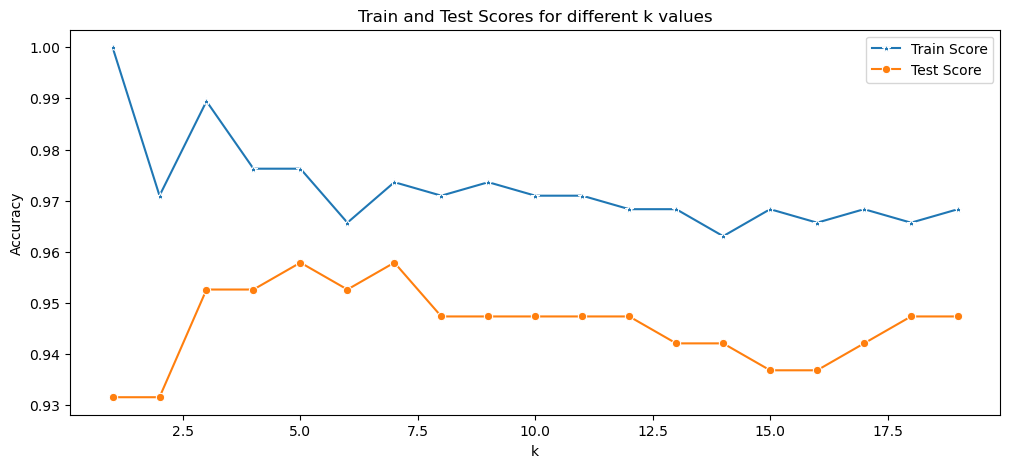

In [95]:
# Plot the scores
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 20), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 20), y=test_scores, marker='o', label='Test Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Train and Test Scores for different k values')
plt.legend()
plt.show()

The best result is captured at k = 6.5 hence 6.5 is used for the final model

In [97]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9473684210526315

# Model Performance Analysis

What is a Confusion Matrix?

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The matrix displays the number of instances produced by the model on the test data.

True positives (TP): occur when the model accurately predicts a positive data point.
True negatives (TN): occur when the model accurately predicts a negative data point.
False positives (FP): occur when the model predicts a positive data point incorrectly.
False negatives (FN): occur when the model mispredicts a negative data point

In [101]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,118,1,119
1,9,62,71
All,127,63,190


Text(0.5, 23.52222222222222, 'Predicted label')

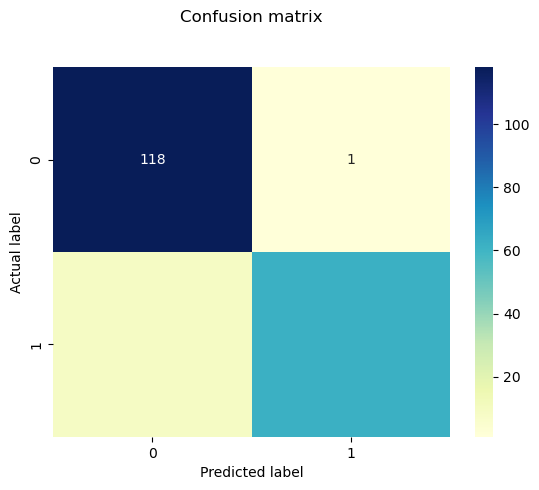

In [103]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 2. Classification Repor
Report which includes Precision, Recall and F1-Score.



In [105]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       119
           1       0.98      0.87      0.93        71

    accuracy                           0.95       190
   macro avg       0.96      0.93      0.94       190
weighted avg       0.95      0.95      0.95       190



# 3. ROC - AUC

In [106]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

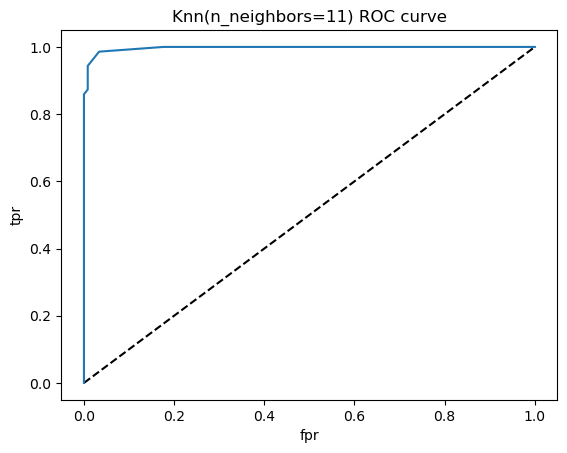

In [107]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [108]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9969818913480886

In [109]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Best Score:0.968390001552554
Best Parameters: {'n_neighbors': 9}
